<a href="https://colab.research.google.com/github/BernasconiLorenzo06/PANDAS_FILE/blob/main/PANDAS_group_by_su_una_colonna_funzioni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv")
df

1. visualizzare il numero totale di record presenti nel file

In [2]:
len(df)

7678

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [3]:
regione = input("inserire una regione   ")
len(df[df["reg"] == regione])

inserire una regione   Lombardia


364

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [4]:
regioneInput = input("inserire una regione   ")
if regioneInput in list(set(df["reg"])):
  print("regione presente  ")
else:
  print("regione  non presente  ")

inserire una regione   Lombardia
regione presente  


4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente

In [5]:
regioneInput = input("inserire una regione   ")
df[df["reg"] == regioneInput].groupby("reg")[["numero_dosi"]].sum()


inserire una regione   Lombardia


,numero_dosi
reg,
Lombardia,28003529


#FUNZIONE crea la funzione che moltiplichi il numero di dosi per un numero

In [6]:
def moltiplicatore(n_dosi):
  return n_dosi * 10

creiamo una colonna del dataframe dove vedremo il risultato della funzione

In [7]:
df["moltiplicatore"] = moltiplicatore(df["numero_dosi"])
df

,area,forn,numero_dosi,data_consegna,N1,N2,ISTAT,reg,moltiplicatore
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo,1350
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo,78000
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo,39000
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo,39000
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo,39000
...,...,...,...,...,...,...,...,...,...
7673,VEN,Pfizer/BioNTech,77760,2022-12-21,ITH,ITH3,5,Veneto,777600
7674,VEN,Sanofi,4800,2023-01-10,ITH,ITH3,5,Veneto,48000
7675,VEN,Pfizer/BioNTech,14400,2023-01-30,ITH,ITH3,5,Veneto,144000
7676,VEN,Novavax,1000,2023-02-03,ITH,ITH3,5,Veneto,10000


5. visualizzare il numero totale di vaccini per ogni fornitore

In [ ]:
dfvaccini = df.groupby("forn")[["numero_dosi"]].sum()
dfvaccini

6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini

In [ ]:
regioneInput = input("inserire una regione   ")
vaccini_per_fornitore = df[df["reg"] == regioneInput].groupby("forn")[["numero_dosi"]].sum().reset_index()
vaccini_per_fornitore

7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre verticali e uno a barre orizzontali. Indicare in modo appropriato il titolo, la legenda e le informazioni presenti negli assi

In [13]:

import matplotlib.pyplot as plt

In [ ]:

labels = vaccini_per_fornitore['forn']
dati = vaccini_per_fornitore["numero_dosi"]

fig, ax = plt.subplots(figsize=(15,8))
ax.bar(labels, dati, label='totale vaccinati in ogni regione')

<BarContainer object of 6 artists>

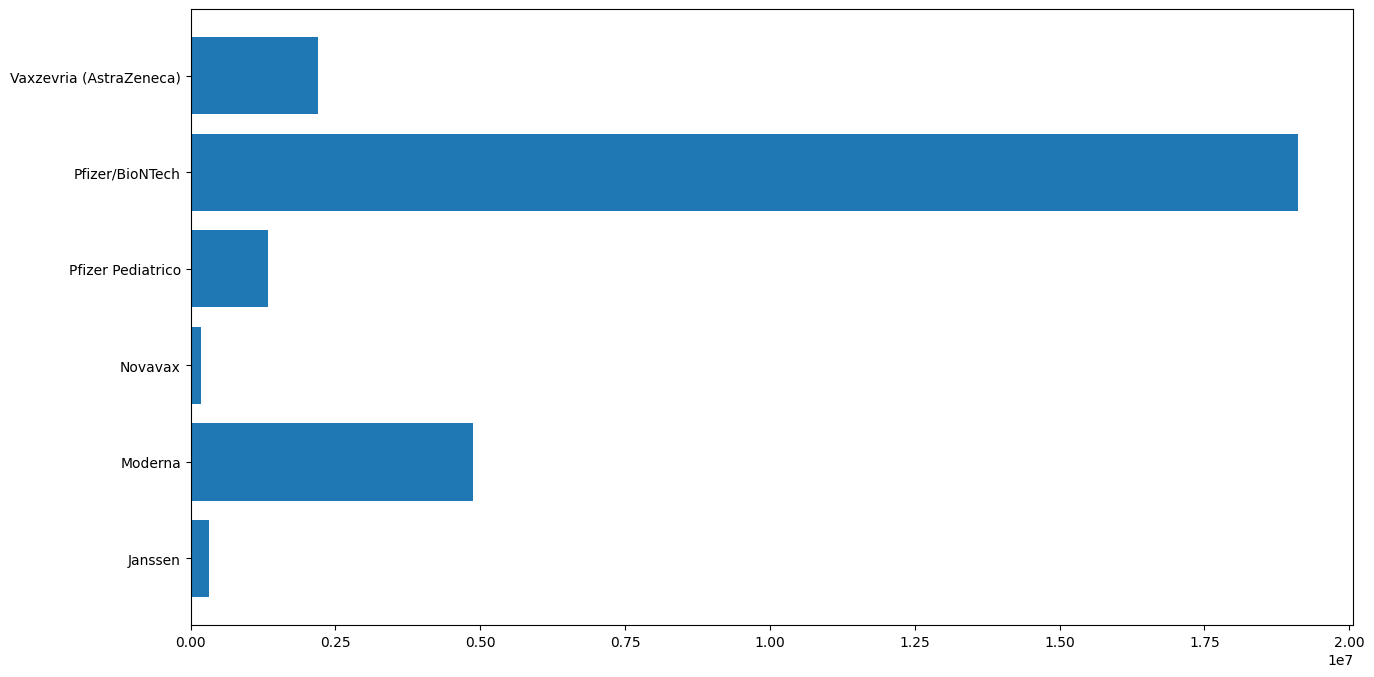

In [17]:

labels = vaccini_per_fornitore['forn']
dati = vaccini_per_fornitore["numero_dosi"]

fig, ax = plt.subplots(figsize=(15,8))
ax.barh(labels, dati, label='totale vaccinati in ogni regione')

In [ ]:
labels = vaccini_per_fornitore['forn']
dati = vaccini_per_fornitore["numero_dosi"]
plt.figure(figsize=(16, 8))
plt.pie(dati, labels=labels, autopct='%1.1f%%')
plt.show()
     